In [2]:
#!/usr/bin/python
# by DBR 6/2016 #

%matplotlib inline  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')


/Users/danielreeves/anaconda/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [4]:

#list the cohorts as they show up in excel
Contr = ['Z09087','Z09106','Z09192','A11201','Z09204'] #control
Trans = ['Z09144','Z08214','Z09125','A11200','Z09196'] #transplant
Nctlr = ['A11214']                                     #natural controller
Stabl = ['A11213','A11221']                            #stable set point no cART
CCR5T = ['A11219','R10155','T10187','R10159','T10173',
          'Z12037','Z12216','Z11151','Z12351','Z12370',
          'Z13133','Z12417','Z12420']                   #ccr5delta mutation transplant

cohorts     = [Contr,Trans,Nctlr,Stabl,CCR5T]
cohort_names= ['Control','Transplant','Natural Controller','Stable ART',r'CCR5$\Delta$ Transplant']
list_names  = [Contr+Trans+Nctlr+Stabl+CCR5T]
list_names  = list_names[0]
num_monkeys = len(list_names)

ATI_list = ['Z09087','Z09106','Z09192','Z09204','Z09144','Z08214','A11200','Z09196'] #8 good rebounds

In [5]:
#colors to use


czb=['darkcyan','indigo','blue','royalblue']
czr=['indianred', 'darkred', 'salmon', 'red']
czg=['green']*len(CCR5T)

#['green', 'limegreen', 'pink', 'red','coral']

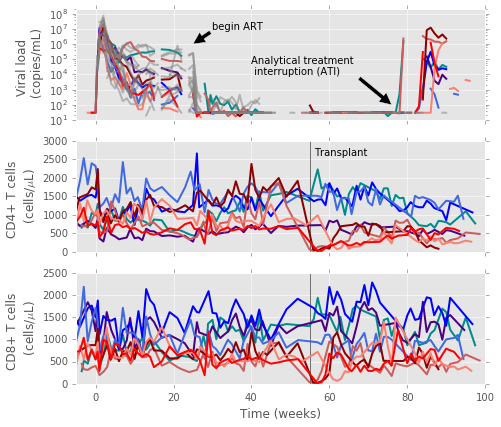

In [6]:
#plot all viral load and T cell data from 3 cohorts in single figures
vl = pd.read_csv('VL.csv')

fig,axarr = plt.subplots(3,1,sharex=True,sharey=False,figsize=(7,6),dpi=600)
#fig=plt.figure(figsize=(7,6),dpi=600)
ax1=axarr[0]#fig.add_subplot(311)
ax2=axarr[1]#fig.add_subplot(312)
ax3=axarr[2]#fig.add_subplot(313)

cind=0; tind=0
for m in list_names:
    
    #get T cell data
    if m in ATI_list:
        tc=pd.read_csv(m+'.csv')
        c4=tc[tc.keys()[43]] #cd4+ all
        c8=tc[tc.keys()[44]] #cd8+
        c5=[]
        for i in range(len(tc[tc.keys()[34]])):
            if tc[tc.keys()[34]][i] == '-': #append zeros in place of '-' as in excel
                c5.append(0)
            else:
                c5.append(tc[tc.keys()[34]][i])

    if m in CCR5T:
        ax1.semilogy(vl['weeks'],vl[m],'-',lw=2,color='gray',alpha=0.5)
    if m in Contr and m in ATI_list:
        ax1.semilogy(vl['weeks'],vl[m],'-',lw=2,color=czb[cind])
        ax2.plot(tc['Weeks Post Infection'],c4,'-',lw=2,color=czb[cind])
        ax3.plot(tc['Weeks Post Infection'],c8,'-',lw=2,color=czb[cind])
        cind+=1
    if m in Trans and m in ATI_list:
        ax1.semilogy(vl['weeks'],vl[m],'-',lw=2,color=czr[tind])
        ax1.set_ylim([10,2e8])
        ax1.set_xlim([-5,100])
        ax1.set_ylabel('Viral load \n (copies/mL)')
        ax2.plot(tc['Weeks Post Infection'],c4,'-',lw=2,color=czr[tind])
        ax2.set_xlim([-5,100])
        ax2.set_ylabel('CD4+ T cells \n (cells/$\mu$L)')
        ax3.plot(tc['Weeks Post Infection'],c8,'-',lw=2,color=czr[tind])
        ax3.set_xlim([-5,100])
        ax3.set_ylabel('CD8+ T cells \n (cells/$\mu$L)')
        ax3.set_xlabel('Time (weeks)')
        tind+=1

#colors = ['gray', 'royalblue', 'tomato']
#labels = ['Others', 'Control', 'Transplant']
#dummies = [ax3.plot([], [], ls='-',lw=3, c=c)[0] for c in colors]     
#ax3.legend(dummies,labels,fontsize=10,loc=1)
#ax1.legend(dummies, labels,fontsize=10,bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=3, mode="expand", borderaxespad=0.)

#for ax in [ax1,ax2,ax3]:
ax1.annotate('begin ART', xy=(25, 1e6), xytext=(30, 1e7),arrowprops=dict(facecolor='black', shrink=1))
ax1.annotate('Analytical treatment \n interruption (ATI)', 
             xy=(76, 1e2), xytext=(40, 1e4),arrowprops=dict(facecolor='black', shrink=1))
#ax2.annotate('Transplant', xy=(55, 1e2), xytext=(60, 1e7),arrowprops=dict(arrowstyle="->"))

ax2.annotate('Transplant', xy=(56, 2500), xytext=(56, 2600),color='k')
ax2.axvspan(55, 55, color='k')
ax3.axvspan(55, 55, color='k')

#ax1.fill_between(np.arange(0,25),np.arange(0,25)*1e8,15,color='lightgreen',alpha=0.3)

plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=10)

plt.gcf().savefig('fig1.pdf')  # No warning now

IndexError: list index out of range

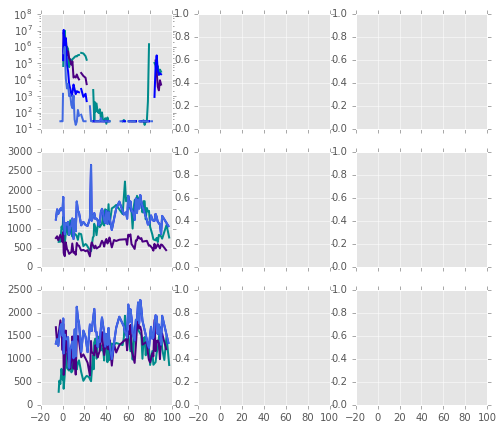

In [5]:
#plot all viral load and T cell data from 3 cohorts in separate figures
vl = pd.read_csv('VL.csv')

fig,axarr = plt.subplots(3,3,sharex=True,sharey=False,figsize=(8,7),dpi=600)

cind=0; tind=0; gind=0
for m in list_names:
    
    #get T cell data
    if m in ATI_list:
        tc=pd.read_csv(m+'.csv')
        c4=tc[tc.keys()[43]] #cd4+ all
        c8=tc[tc.keys()[44]] #cd8+
        c5=[]
        for i in range(len(tc[tc.keys()[34]])):
            if tc[tc.keys()[34]][i] == '-': #append zeros in place of '-' as in excel
                c5.append(0)
            else:
                c5.append(tc[tc.keys()[34]][i])

    if m in CCR5T:
        axarr[0][2].semilogy(vl['weeks'],vl[m],'-',lw=2,color=czg[gind],alpha=0.5)
        gind+=1
    if m in Contr:
        axarr[0][0].semilogy(vl['weeks'],vl[m],'-',lw=2,color=czb[cind])        
        axarr[1][0].plot(tc['Weeks Post Infection'],c4,'-',lw=2,color=czb[cind])
        axarr[2][0].plot(tc['Weeks Post Infection'],c8,'-',lw=2,color=czb[cind])
        cind+=1
    if m in Trans:
        axarr[0][1].semilogy(vl['weeks'],vl[m],'-',lw=2,color=czr[tind])
        axarr[1][1].plot(tc['Weeks Post Infection'],c4,'-',lw=2,color=czr[tind])
        axarr[2][1].plot(tc['Weeks Post Infection'],c8,'-',lw=2,color=czr[tind])
        tind+=1

#colors = ['gray', 'royalblue', 'tomato']
#labels = ['Others', 'Control', 'Transplant']
#dummies = [ax3.plot([], [], ls='-',lw=3, c=c)[0] for c in colors]     
#ax3.legend(dummies,labels,fontsize=10,loc=1)
#ax1.legend(dummies, labels,fontsize=10,bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=3, mode="expand", borderaxespad=0.)

axarr[0][0].set_title('Control')
axarr[0][1].set_title('Transplant')
axarr[0][2].set_title(r'CCR5$\Delta$32 Transplant')

axarr[0][0].set_xlim([-5,100])
axarr[0][0].set_ylabel('Viral load (copies/mL)')
axarr[2][1].set_xlabel('Time (weeks)')
axarr[2][0].set_ylabel('CD8+ T cells (cells/$\mu$L)')
axarr[1][0].set_ylabel('CD4+ T cells (cells/$\mu$L)')

for i in range(3):
    axarr[0][i].set_ylim([10,2e8])
    axarr[1][i].set_ylim([10,2500])
    axarr[2][i].set_ylim([10,2500])

    #axarr[i][1].annotate('Transplant', xy=(56, 2500), xytext=(56, 2600),color='k')
    axarr[i][1].axvspan(55, 55, color='gray',lw=1)
    [axarr[i][j].axvspan(26, 26, color='gray',lw=1) for j in range(3)]
    [axarr[i][j].axvspan(76, 76, color='gray',lw=1) for j in range(3)]
    axarr[0][i].annotate('begin \n ART', xy=(25, 1e6), xytext=(30, 1e7))#,arrowprops=dict(facecolor='black', shrink=1))
    axarr[0][i].annotate('ATI', xy=(25, 1e6), xytext=(80, 2e7))#,arrowprops=dict(facecolor='black', shrink=1))

axarr[0][1].annotate('Trans', xy=(55, 1e2), xytext=(40, 1e4))#xy=(55, 1e2),arrowprops=dict(arrowstyle="->"))


plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=10)

plt.gcf().savefig('fig1_separate.pdf')  # No warning now

In [ ]:
cz[3]

## What are the real susceptible cells? CD4+/CCR5+ T cells??

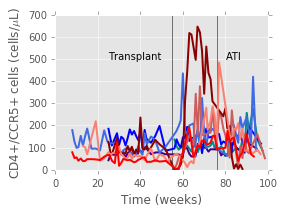

In [7]:
fig=plt.figure(figsize=(4,3),dpi=600)
ax=fig.add_subplot(111)

cind=0; tind=0; totc=[]; tott=[]
for m in ATI_list:
    
    tc=pd.read_csv(m+'.csv')
    
    c5=[]
    for i in range(len(tc[tc.keys()[47]])): #34 for pct
        if tc[tc.keys()[47]][i] == '-':
            c5.append(np.nan)
        else:
            c5.append(tc[tc.keys()[47]][i])
    
    if m in Contr:
        plt.plot(tc[u'Weeks Post Infection'],c5,'-',lw=2,color=czb[cind])
        totc.append(c5)
        cind+=1
    else:
        plt.plot(tc[u'Weeks Post Infection'],c5,'-',lw=2,color=czr[tind])
        tott.append(c5)
        tind+=1
        
ax.annotate('Transplant', xy=(56, 500), xytext=(25, 500),color='k')
ax.axvspan(55, 55, color='k')

ax.annotate('ATI', xy=(76, 500), xytext=(80, 500),color='k')
ax.axvspan(76, 76, color='k')

plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=10)

ax.set_ylabel('CD4+/CCR5+ cells (cells/$\mu$L)')
ax.set_xlabel('Time (weeks)')

plt.tight_layout()
plt.gcf().savefig('pct_ccr5.pdf')  # No warning now

#ax2=fig.add_subplot(122)
#plt.plot(tc[u'Weeks Post Infection'],np.mean(totc),color='royalblue')
#plt.plot(tc[u'Weeks Post Infection'],np.mean(tott),color='tomato')

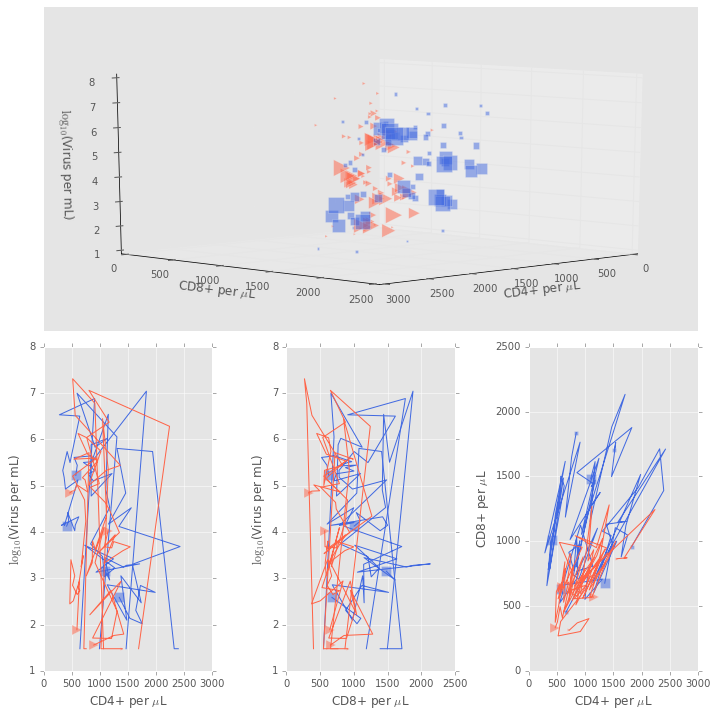

In [8]:
from mpl_toolkits.mplot3d import Axes3D

#function to get the correct trajectories in 3D, mostly challenging because not all at same time points
def get_xyz(monkey):
    tc=pd.read_csv(monkey + '.csv')
    
    c4=tc[tc.keys()[43]] #cd4+ all for specific monkey
    c8=tc[tc.keys()[44]] #cd8+
    
    tcell_times = np.round(np.array(tc['Weeks Post Infection'].tolist())) #have to round the t cell times... ugh

    VL_for3D=[]; C4_for3D=[]; C8_for3D=[]
    #for week in np.arange(-2,18):#loop through outbreak weeks
        #if week in vl['weeks'] and week in tcell_times: #if week in both timesets
    for week in vl['weeks'][0:25].tolist(): #first 25 datapoints
        if week in tcell_times: #also in tcell times
            VL_for3D.append(vl[monkey][vl[vl['weeks']==week].index.tolist()[0]]) #note vl is global for all monkeys
            C4_for3D.append(c4[np.where(tcell_times==week)[0][0]])
            C8_for3D.append(c8[np.where(tcell_times==week)[0][0]])

    return np.log10(VL_for3D),C4_for3D,C8_for3D


fig=plt.figure(figsize=(10,10),dpi=600)
ax1 = fig.add_subplot(211, projection='3d')
ax2 = fig.add_subplot(234)
ax3 = fig.add_subplot(235)
ax4 = fig.add_subplot(236)

ax1.set_xlabel('CD4+ per $\mu$L')
ax1.set_ylabel('CD8+ per $\mu$L')
ax1.set_zlabel(r'$\log_{10}$(Virus per mL)')

ax2.set_xlabel('CD4+ per $\mu$L')
ax2.set_ylabel(r'$\log_{10}$(Virus per mL)')

ax3.set_xlabel('CD8+ per $\mu$L')
ax3.set_ylabel(r'$\log_{10}$(Virus per mL)')

ax4.set_xlabel('CD4+ per $\mu$L')
ax4.set_ylabel('CD8+ per $\mu$L')


for monkey in ATI_list:
    z,x,y = get_xyz(monkey)

    if monkey in Contr:
        col='royalblue'; mark='s'
    if monkey in Trans:
        col='tomato'; mark='>'

    t=5*np.exp(np.arange(len(z))/5)
    
    ax1.scatter(x, y, z, s=t,c=col,marker=mark,alpha=0.5)
    ax1.view_init(elev=10., azim=45)

    ax2.plot(x,z,c=col)
    ax2.scatter(x[0],z[0],s=10,c=col,marker=mark,alpha=0.5)
    ax2.scatter(x[-1],z[-1],s=100,c=col,marker=mark,alpha=0.5)
    ax3.plot(y,z,c=col)
    #ax2.scatter(x, z, s=t,c=col,marker=mark,alpha=0.5)
    #ax3.scatter(y, z, s=t,c=col,marker=mark,alpha=0.5)
    ax3.scatter(y[0],z[0],s=10,c=col,marker=mark,alpha=0.5)
    ax3.scatter(y[-1],z[-1],s=100,c=col,marker=mark,alpha=0.5)
    ax4.plot(x,y,c=col)
    ax4.scatter(x[0],y[0],s=10,c=col,marker=mark,alpha=0.5)
    ax4.scatter(x[-1],y[-1],s=100,c=col,marker=mark,alpha=0.5)

    
    
    plt.tight_layout()


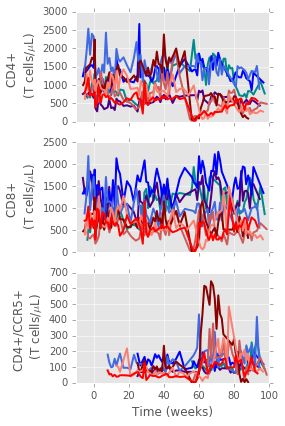

In [9]:
#T cell data from 3 cohorts in single figures

fig1,axarr = plt.subplots(3,1,sharex=True,sharey=False,figsize=(4,6),dpi=600)

cind=0; tind=0
for m in list_names:
    
    #get T cell data
    if m in ATI_list:
        tc=pd.read_csv(m+'.csv')
        c4=tc[tc.keys()[43]] #cd4+ all
        c8=tc[tc.keys()[44]] #cd8+
        c5=[]
        
        for i in range(len(tc[tc.keys()[47]])): #34 for pct
            if tc[tc.keys()[47]][i] == '-':
                c5.append(np.nan)
            else:
                c5.append(tc[tc.keys()[47]][i])
                
    if m in Contr and m in ATI_list:
        axarr[0].plot(tc['Weeks Post Infection'],c4,'-',lw=2,color=czb[cind])
        axarr[1].plot(tc['Weeks Post Infection'],c8,'-',lw=2,color=czb[cind])
        axarr[2].plot(tc[u'Weeks Post Infection'],c5,'-',lw=2,color=czb[cind])        
        cind+=1
    if m in Trans and m in ATI_list:
        axarr[0].plot(tc['Weeks Post Infection'],c4,'-',lw=2,color=czr[tind])
        axarr[1].plot(tc['Weeks Post Infection'],c8,'-',lw=2,color=czr[tind])
        axarr[2].plot(tc[u'Weeks Post Infection'],c5,'-',lw=2,color=czr[tind])
        tind+=1

axarr[0].set_ylabel('CD4+ \n (T cells/$\mu$L)')
axarr[1].set_ylabel('CD8+ \n (T cells/$\mu$L)')
axarr[2].set_ylabel('CD4+/CCR5+ \n (T cells/$\mu$L)')

axarr[2].set_xlabel('Time (weeks)')

'''
for i in range(3):
    axarr[i].annotate('Transplant', xy=(56, 500), xytext=(25, 500),color='k')
    axarr[i].axvspan(55, 55, color='k')

    axarr[i].annotate('ATI', xy=(76, 500), xytext=(80, 500),color='k')
    axarr[i].axvspan(76, 76, color='k')
'''

axarr[0].set_xlim([-10,100])

plt.tight_layout()

plt.gcf().savefig('fig3_tcell_counts.pdf')  # No warning now

/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: M

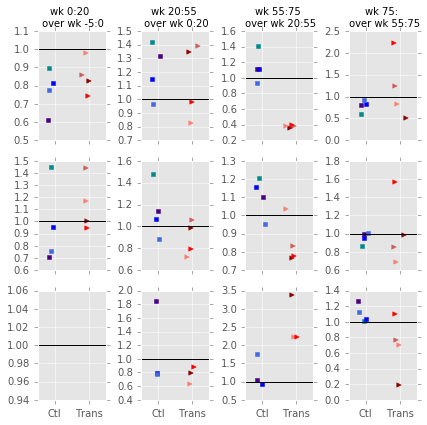

In [11]:
#T cell data from 3 cohorts in single figures

noise=0.1
fig2,axarr2 = plt.subplots(3,4,sharex=True,sharey=False,figsize=(6,6),dpi=600)

#indices when ART was removed for ATI, in those that it wasn't removed set to earliest removal time
off_art_indices = [65,65,68,68,68,65,71,68,68,68,75,65,65,65,65,74,65,65,65,65,65,65,65,65,65,65] 

names_in_order = ['Z09087', 'Z09144', 'Z09106', 'Z09192', 'Z08214', 'Z09125', 'A11200',
 'A11201', 'Z09196', 'Z09204', 'A11219', 'A11221', 'A11213', 'A11214', 'R10155',
 'T10187', 'R10159', 'T10173', 'Z12037', 'Z12216', 'Z11151', 'Z12351', 'Z12370',
 'Z13133', 'Z12417', 'Z12420']

cind=0; tind=0
for k in range(len(names_in_order)):
    
    m=names_in_order[k]
    #indices of weeks
    ind_names = ['wk 0:20 \n over wk -5:0','wk 20:55 \n over wk 0:20','wk 55:75 \n over wk 20:55','wk 75: \n over wk 55:75']
    ind_vals  = [0,6,27,47,off_art_indices[k],77]
    
    S=20
    #get T cell data
    if m in ATI_list:
        tc=pd.read_csv(m+'.csv')
        c4=tc[tc.keys()[43]] #cd4+ all
        c8=tc[tc.keys()[44]] #cd8+
        c5=[]
        
        for i in range(len(tc[tc.keys()[47]])): #34 for pct
            if tc[tc.keys()[47]][i] == '-':
                c5.append(np.nan)
            else:
                c5.append(float(tc[tc.keys()[47]][i]))
    
        #plot the ratio of all index categories to the pre-SHIV data
        for j in range(4):
            rat4 = np.nanmean(c4[ind_vals[j+1]:ind_vals[j+2]])/np.nanmean(c4[ind_vals[j]:ind_vals[j+1]]) 
            rat8 = np.nanmean(c8[ind_vals[j+1]:ind_vals[j+2]])/np.nanmean(c8[ind_vals[j]:ind_vals[j+1]])
            rat5 = np.nanmean(c5[ind_vals[j+1]:ind_vals[j+2]])/np.nanmean(c5[ind_vals[j]:ind_vals[j+1]])

            #if np.isnan(rat5):
            #    rat5=0
            
            if m in Contr:
                axarr2[0][j].scatter(1+np.random.normal(-noise,noise,size=1),rat4,s=S,marker='s',color=czb[cind])
                axarr2[1][j].scatter(1+np.random.normal(-noise,noise,size=1),rat8,s=S,marker='s',color=czb[cind])
                axarr2[2][j].scatter(1+np.random.normal(-noise,noise,size=1),rat5,s=S,marker='s',color=czb[cind])
            if m in Trans:
                axarr2[0][j].scatter(2+np.random.normal(-noise,noise,size=1),rat4,s=S,marker='>',color=czr[tind])
                axarr2[1][j].scatter(2+np.random.normal(-noise,noise,size=1),rat8,s=S,marker='>',color=czr[tind])
                axarr2[2][j].scatter(2+np.random.normal(-noise,noise,size=1),rat5,s=S,marker='>',color=czr[tind])
            
                
        if m in Trans:
            tind+=1
        if m in Contr:
            cind+=1
    
for j in range(4):
    axarr2[0][j].set_title(ind_names[j],fontsize=10)
    for i in range(3):
        axarr2[i][j].axhline(y=1,color='k')

axarr2[0][0].set_xlim([0.5,2.5])
plt.xticks([1,2],['Ctl','Trans'])
#plt.yticks([0,1,2,3],[0,1,2,3])

plt.tight_layout()

plt.gcf().savefig('fig3_tcell_ratios_new.pdf')  # No warning now

In [24]:
off_art_indices = [65,65,68,68,68,0,71,68,68,68,75,0,0,0,0,74,0,0,0,0,0,0,0,0,0,0]
[off_art_indices[off_art_indices[i]==0]=77 for i in range(len(off_art_indices))]

off_art_indices

SyntaxError: invalid syntax (<ipython-input-24-ac5ecec25785>, line 2)

In [21]:
offART = [77,77,81,81,81,0,84,81,81,81,90,0,0,0,0,89,0,0,0,0,0,0,0,0,0,0]

[65,65,68,68,68,0,71,68,68,68,75,0,0,0,0,74,0,0,0,0,0,0,0,0,0,0]


SyntaxError: invalid syntax (<ipython-input-21-b5c91c48c5bd>, line 1)